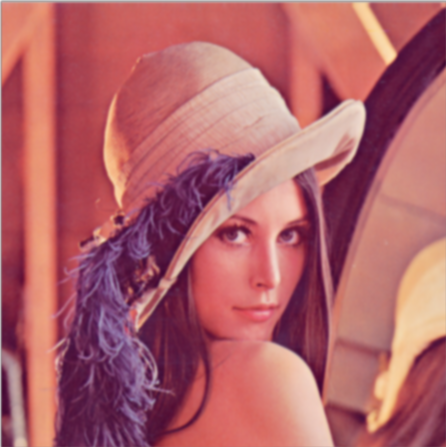

In [2]:
from PIL import Image
import numpy as np

def convolve3d(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1,image.shape[2]))
    image_padded[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:,:] = image
    image_padded[0,0,:]=image[0,0,:]
    image_padded[-1,-1,:]=image[-1,-1,:]
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            for z in range(image.shape[2]):
                output[y,x,z]=(kernel * image_padded[y: y+kernel.shape[0], x: x+kernel.shape[1],z]).sum()
    return output

gaussian_blur=np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256

box_blur=np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])/9

im = np.array(Image.open("iptask2.png"))
pil_img=Image.fromarray(convolve3d(im, gaussian_blur))
pil_img.save('gaussianimage.png')
Image.open('gaussianimage.png')